This data was provided by the New York Times. Data includes daily number of total cases at a county level. 

The data is downloadable at: https://github.com/nytimes/covid-19-data

The data is presented by NYT journalists at: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html

In [137]:
import pandas as pd

countydata = pd.read_csv("us-counties.csv",parse_dates=["date"])
print("Most recent date: %s" % max(countydata["date"]))
countydata.head()

Most recent date: 2020-03-31 00:00:00


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [131]:
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.dates import DateFormatter
from datetime import date, timedelta
from matplotlib.ticker import ScalarFormatter
import datetime
import numpy as np 

#To-do: 
# implement ways to have counties in different specified states
# implement ways to make a regression line for each county 

def regressionline(days,dates,count,color="lightgrey"):
    dates = dates[count>0]
    count = count[count>0]
    #fits a regression line for length of time defined by variable "days"
    #dates and count are the index and the column "cases" of the csv file (properly aggregated or just for 1 county)
    
    todaydiff = [(max(dates) - day)/np.timedelta64(1,'D') for day in dates] # number of days before today for creating mask
    mask = np.array(todaydiff) <= days 
    
    datediff = np.array([day - min(dates) for day in dates]) # for plotting regression line 
    
    fity = [np.log2(x) for x in count[mask]]
    fitx = [delta/np.timedelta64(1,'D') for delta in datediff[mask]] # number of days since beginning
    m,b = np.polyfit(fitx,fity,1)
    fitliney = [(2**b)*2**(delta/np.timedelta64(1,'D')*m) for delta in datediff]
    
    plt.plot(dates,fitliney,ls="dotted",linewidth=2,label="Doubling every "+"{:3.1f}".format(1/m)+" days: Regression on last %d days" % days,c=color)


def loglogplot(countyset,state="",deaths=False,totals=True):
    ykey = "cases"
    if deaths:
        ykey = "deaths"
    
    if state!="":
        df = countydata[countydata["state"]==state]
        df = df[df["county"].isin(countyset)]
    else:
        df = countydata[countydata["county"].isin(countyset)]
    df = df.set_index("date")
    
    if len(countyset)>1:
        fig,ax  = plt.subplots(1,figsize=(9,9))
    else:
        fig,ax  = plt.subplots(1,figsize=(6,6))
        
    plt.yscale("log")
    
    if len(countyset)>1:
        #plot each county individually
        for cty in countyset:
            singlecounty = df[df["county"]==cty]
            ax.plot(singlecounty.index.values,singlecounty[ykey],label=cty+" County")
          
        if totals:
            df = df.groupby(["date"]).sum()
            ax.plot(df.index.values,df[ykey],c="k",linewidth=3,label="Total %s" % ykey)
            regressionline(30,np.array(df.index.values),np.array(df[ykey]),color="cornflowerblue")
            regressionline(10,np.array(df.index.values),np.array(df[ykey]),color="mediumblue")
    else:
        ax.plot(df.index.values,df[ykey],c="k",label="Total %s: %s County" % (ykey,countyset[0]))
        
    if totals or len(countyset)==1:
    regressionline(30,np.array(df.index.values),np.array(df[ykey]),color="cornflowerblue")
    regressionline(10,np.array(df.index.values),np.array(df[ykey]),color="mediumblue")
    
    
    #setting plot bounds
    plt.ylim(1,max(df[ykey])*1.2)
    if len(countyset)>1:
        firstday = (df.index.values[df[ykey]>4]).min()
    else:
        firstday = (df.index.values[df[ykey]>2]).min()
    plt.xlim(firstday,df.index.values.max())

    #plot style and tick labelling
    loc = matplotlib.dates.AutoDateLocator()
    formatter = DateFormatter('%m/%d/%y')
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45)
    plt.minorticks_on()
    ax.yaxis.set_major_formatter(ScalarFormatter())
    plt.grid(alpha=0.3)
    plt.legend()
    
    #axis labelling and title
    plt.title("COVID-19 Spread\nData gathered from New York Times")
    plt.xlabel("Date")
    plt.ylabel("Confirmed %s" % ykey)

    plt.show()
 

IndentationError: expected an indented block (<ipython-input-131-5d55fe444280>, line 66)

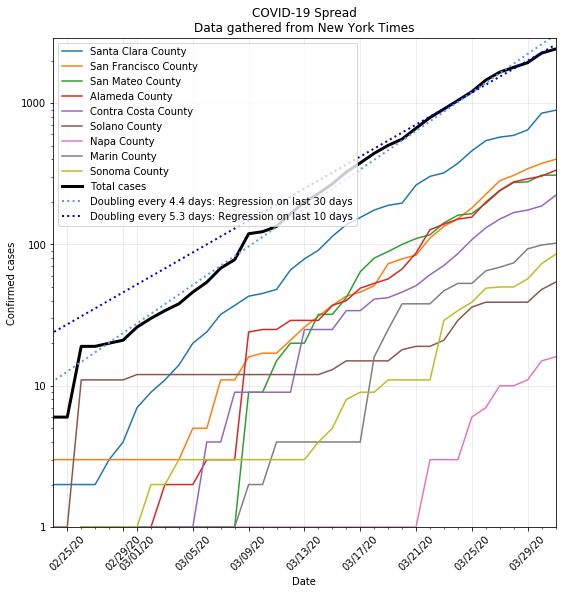

In [132]:
   
baycounties = ["Santa Clara", "San Francisco", "San Mateo", "Alameda", "Contra Costa", "Solano", "Napa", "Marin", "Sonoma"]
loglogplot(baycounties)

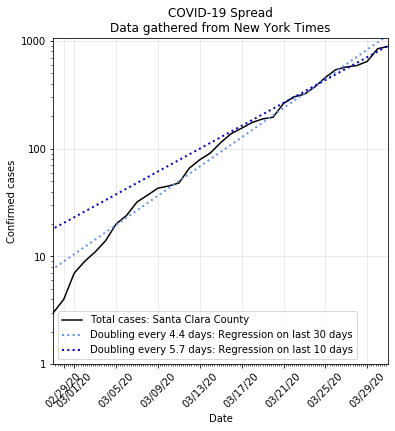

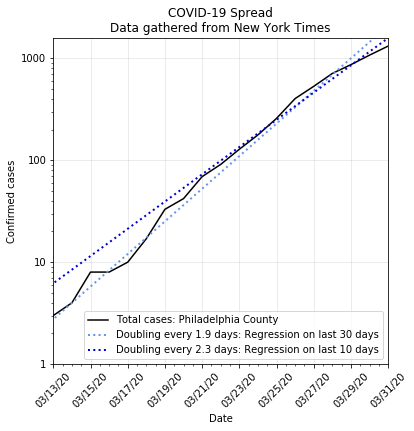

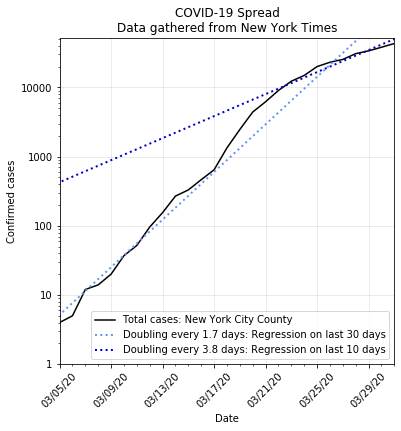

In [133]:
loglogplot(["Santa Clara"])
loglogplot(["Philadelphia"])
loglogplot(["New York City"])

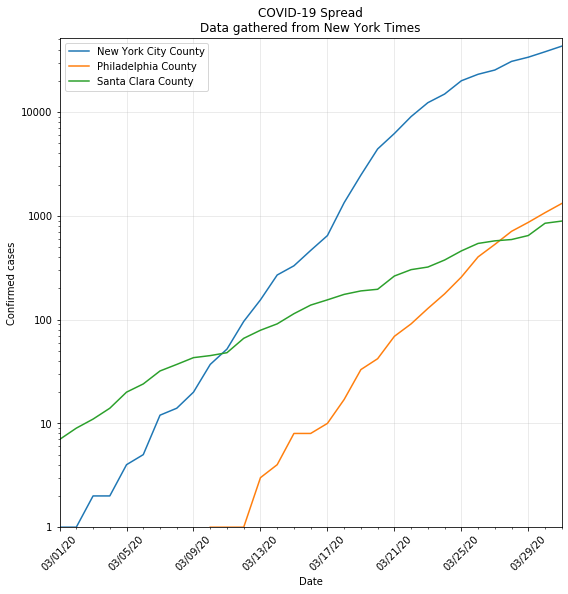

In [134]:
countydata[countydata["state"]=="New York"]["county"].value_counts()
loglogplot(["New York City", "Philadelphia", "Santa Clara"],totals=False)